1.在Python中，通常有这几种方式来表示时间：1）时间戳 2）格式化的时间字符串 3）元组（struct_time）共九个元素。由于Python的time模块实现主要调用C库，所以各个平台可能有所不同。

2.UTC（Coordinated Universal Time，世界协调时）亦即格林威治天文时间，世界标准时间。在中国为UTC+8。DST（Daylight Saving Time）即夏令时。

3.时间戳（timestamp）的方式：通常来说，时间戳表示的是从1970年1月1日00:00:00开始按秒计算的偏移量。我们运行“type(time.time())”，返回的是float类型。返回时间戳方式的函数主要有time()，clock()等。

4.元组（struct_time）方式：struct_time元组共有9个元素，返回struct_time的函数主要有gmtime()，localtime()，strptime()。下面列出这种方式元组中的几个元素：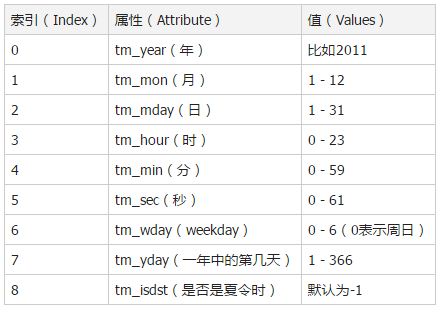

In [2]:
import time

# 1）time.localtime([secs])
将一个时间戳转换为当前时区的struct_time。secs参数未提供，则以当前时间为准。

In [3]:
time.localtime()

time.struct_time(tm_year=2018, tm_mon=2, tm_mday=28, tm_hour=14, tm_min=50, tm_sec=43, tm_wday=2, tm_yday=59, tm_isdst=0)

In [9]:
 time.localtime(1524575584.1361799)

time.struct_time(tm_year=2018, tm_mon=4, tm_mday=24, tm_hour=21, tm_min=13, tm_sec=4, tm_wday=1, tm_yday=114, tm_isdst=0)

# 2）time.gmtime([secs])
和localtime()方法类似，gmtime()方法是将一个时间戳转换为UTC时区（0时区）的struct_time。

In [10]:
time.gmtime()

time.struct_time(tm_year=2018, tm_mon=2, tm_mday=28, tm_hour=6, tm_min=52, tm_sec=4, tm_wday=2, tm_yday=59, tm_isdst=0)

# 3）time.time()
返回当前时间的时间戳。

In [11]:
time.time()

1519800842.1569753

# 4）time.mktime(t)
将一个struct_time转化为时间戳。

In [12]:
time.mktime(time.localtime())

1519800898.0

# 5）time.sleep(secs)
线程推迟指定的时间运行。单位为秒

In [13]:
for i in range(3):
    print(i)
    time.sleep(2)

0
1
2


# 6）time.clock()
这个需要注意，在不同的系统上含义不同。在UNIX系统上，它返回的是“进程时间”，它是用秒表示的浮点数（时间戳）。而在WINDOWS中，第一次调用，返回的是进程运行的实际时间。而第二次之后的调用是自第一次调用以后到现在的运行时间。（实际上是以WIN32上QueryPerformanceCounter()为基础，它比毫秒表示更为精确）

In [14]:
import time
if __name__=='__main__':
    time.sleep(1)
    print("clock(1):%s" %time.clock())
    time.sleep(1)
    print("clock(2):%s" %time.clock()) 
    time.sleep(1)
    print("clock(3):%s" %time.clock()) 

clock(1):9.622132444162765e-07
clock(2):1.0000423373827543
clock(3):2.000094617635701


其中第一个clock()输出的是程序运行时间

第二、三个clock()输出的都是与第一个clock的时间间隔

# 7）time.asctime([t])
把一个表示时间的元组或者struct_time表示为这种形式：'Sun Jun 20 23:21:05 1993'。如果没有参数，将会将time.localtime()作为参数传入。

In [15]:
time.asctime()

'Wed Feb 28 15:04:30 2018'

# 8）time.ctime([secs])
把一个时间戳（按秒计算的浮点数）转化为time.asctime()的形式。如果参数未给或者为None的时候，将会默认time.time()为参数。它的作用相当于time.asctime(time.localtime(secs))。

In [19]:
time.ctime()

'Wed Feb 28 15:08:13 2018'

# 9）time.strftime(format[, t])
把一个代表时间的元组或者struct_time（如由time.localtime()和time.gmtime()返回）转化为格式化的时间字符串。如果t未指定，将传入time.localtime()。如果元组中任何一个元素越界，ValueError的错误将会被抛出。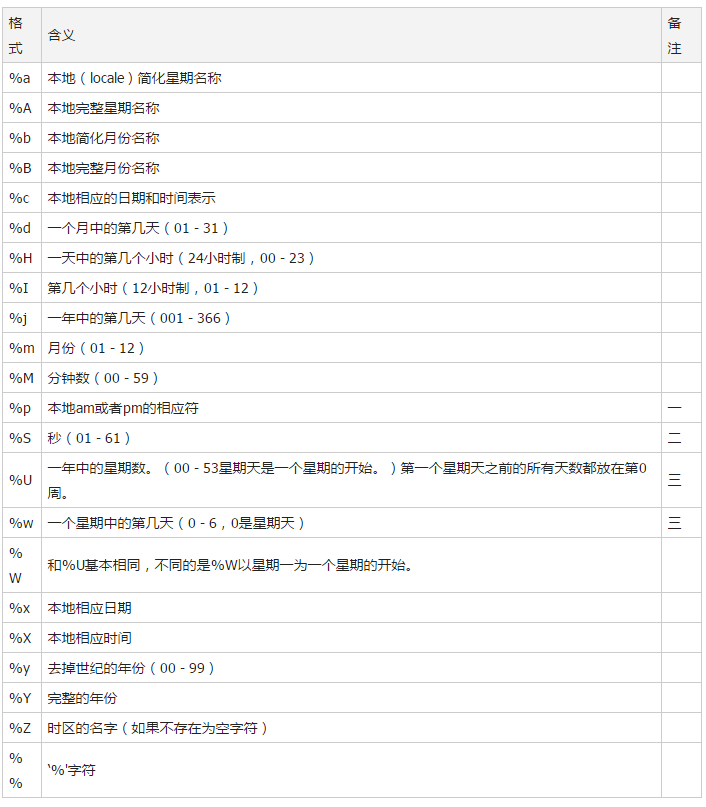

备注：
“%p”只有与“%I”配合使用才有效果。
文档中强调确实是0 - 61，而不是59，闰年秒占两秒（汗一个）。
当使用strptime()函数时，只有当在这年中的周数和天数被确定的时候%U和%W才会被计算。

In [18]:
time.strftime("%Y-%m-%d %H:%M:%S",time.localtime())

'2018-02-28 15:07:31'

# 10）time.strptime(string[, format])
把一个格式化时间字符串转化为struct_time。实际上它和strftime()是逆操作。

In [22]:
time.strptime('2018-02-05 16:37:06', '%Y-%m-%d %X')

time.struct_time(tm_year=2018, tm_mon=2, tm_mday=5, tm_hour=16, tm_min=37, tm_sec=6, tm_wday=0, tm_yday=36, tm_isdst=-1)

最后，我们来对time模块进行一个总结。根据之前描述，在Python中共有三种表达方式：1）timestamp 2）tuple或者struct_time 3）格式化字符串。

它们之间的转化如图所示：
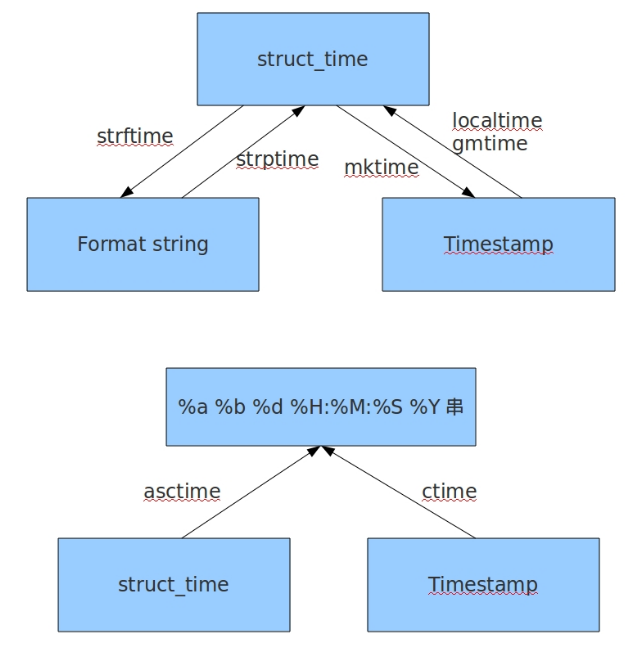